In [193]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [194]:
star_wars=pd.read_csv("star_wars.csv",encoding="ISO-8859-1")

In [195]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

In [196]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [197]:
#remove null RespondentID
print("before null removal:",star_wars.shape)
bool=pd.notnull(star_wars["RespondentID"])
star_wars=star_wars[bool]
print(" after null removal:",star_wars.shape)

#directly remove null RespondentID
#test=star_wars[pd.notnull(star_wars["RespondentID"])]

before null removal: (1187, 38)
 after null removal: (1186, 38)


In [198]:
#star_wars.iloc[:,1].value_counts()
#star_wars.iloc[:,2].value_counts()

In [199]:
#create boolean dictionary and map responses
y_n_dict={"Yes": True,"No":False}

In [200]:
y_n_dict

{'Yes': True, 'No': False}

In [201]:
q1="Have you seen any of the 6 films in the Star Wars franchise?"
q2="Do you consider yourself to be a fan of the Star Wars film franchise?"
#overwrite existing df column with new values
star_wars[q1]=star_wars[q1].map(y_n_dict)
star_wars[q2]=star_wars[q2].map(y_n_dict)

In [202]:
name_dict={np.NaN: False,
           'Star Wars: Episode I  The Phantom Menace':True,
           'Star Wars: Episode II  Attack of the Clones':True,
           'Star Wars: Episode III  Revenge of the Sith':True,
           'Star Wars: Episode IV  A New Hope':True,
           'Star Wars: Episode V The Empire Strikes Back':True,
           'Star Wars: Episode VI Return of the Jedi':True
          }

In [203]:
#map answers to True, False, NaN
star_wars['Which of the following Star Wars films have you seen? Please select all that apply.']=star_wars['Which of the following Star Wars films have you seen? Please select all that apply.'].map(name_dict)
star_wars['Unnamed: 4']=star_wars['Unnamed: 4'].map(name_dict)
star_wars['Unnamed: 5']=star_wars['Unnamed: 5'].map(name_dict)
star_wars['Unnamed: 6']=star_wars['Unnamed: 6'].map(name_dict)
star_wars['Unnamed: 7']=star_wars['Unnamed: 7'].map(name_dict)
star_wars['Unnamed: 8']=star_wars['Unnamed: 8'].map(name_dict)

In [204]:
star_wars.columns[3:9]

Index(['Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')

In [205]:
star_wars.rename(columns=
                {
                'Which of the following Star Wars films have you seen? Please select all that apply.':'seen_1',
                'Unnamed: 4':'seen_2',
                'Unnamed: 5':'seen_3',
                'Unnamed: 6':'seen_4',
                'Unnamed: 7':'seen_5',
                'Unnamed: 8':'seen_6'
                },inplace=True)

In [206]:
star_wars.columns[3:9]

Index(['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6'], dtype='object')

In [207]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [208]:
#columns is an index
star_wars[star_wars.columns[9:15]]=star_wars[star_wars.columns[9:15]].astype(float)

In [209]:
star_wars.rename(columns=
                {
                'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.':'ranking_1',
                'Unnamed: 10':'ranking_2',
                'Unnamed: 11':'ranking_3',
                'Unnamed: 12':'ranking_4',
                'Unnamed: 13':'ranking_5',
                'Unnamed: 14':'ranking_6'
                },inplace=True)

In [210]:
#HIGHEST RANKED MOVIES
sw_ranking=star_wars[star_wars.columns[9:15]].mean().sort_values()
round(sw_ranking,2)

ranking_5    2.51
ranking_6    3.05
ranking_4    3.27
ranking_1    3.73
ranking_2    4.09
ranking_3    4.34
dtype: float64

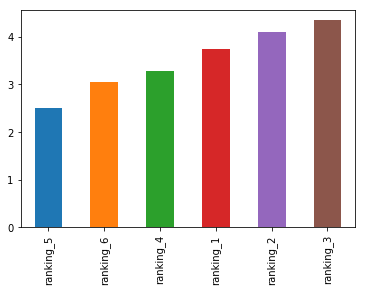

In [211]:
sw_ranking.plot.bar()
plt.show()

In [212]:
#What we've done so far:
#We scrubbed the data types and titles and aggregated the numbers
#My ranking theory:
#The "classic" SW movies are ranked the best (Ep 4-6)
#The "new" SW movies are ranked in the order they apppeared (Ep 1-3)
#This is because sequels tend to get lower ratings.

In [213]:
#MOST VIEWED MOVIES
sw_seen=star_wars.iloc[:,3:9].sum().sort_values(ascending=False)
sw_seen

seen_5    758
seen_6    738
seen_1    673
seen_4    607
seen_2    571
seen_3    550
dtype: int64

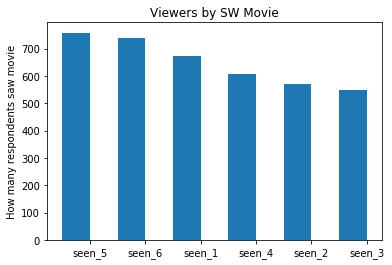

In [214]:
#fancy bar chart using figure object. requires more setup than
#plotting with df.plot.bar()
fig, ax=plt.subplots()
ind=np.arange(6)+.25 #the x locations for seen. .25 spaces off origin.
barwidth=0.5  #the width of bars
ax.bar(ind,sw_seen,barwidth)
ax.set_xticklabels(sw_seen.index) #tick labels
ax.set_xticks(ind+barwidth/2) #specify xtick locations
ax.set_ylabel("How many respondents saw movie")
ax.set_title("Viewers by SW Movie")
plt.show()

In [215]:
#More seen/popular SW movies tend to have higher rankings.

In [216]:
males=star_wars[star_wars["Gender"]=="Male"]
females=star_wars[star_wars["Gender"]=="Female"]

In [217]:
#MALES HIGHEST RANKED MOVIES
male_sw_ranking=males[males.columns[9:15]].mean()
print("MALES HIGHEST RANKED MOVIES")
male_sw_ranking

MALES HIGHEST RANKED MOVIES


ranking_1    4.037825
ranking_2    4.224586
ranking_3    4.274882
ranking_4    2.997636
ranking_5    2.458629
ranking_6    3.002364
dtype: float64

In [218]:
#FEMALES HIGHEST RANKED MOVIES
female_sw_ranking=females[females.columns[9:15]].mean()
print("FEMALES HIGHEST RANKED MOVIES")
female_sw_ranking

FEMALES HIGHEST RANKED MOVIES


ranking_1    3.429293
ranking_2    3.954660
ranking_3    4.418136
ranking_4    3.544081
ranking_5    2.569270
ranking_6    3.078086
dtype: float64

In [219]:
#MALE MOST VIEWED MOVIES
male_sw_seen=males.iloc[:,3:9].sum().sort_values(ascending=False)
print("MALES MOST VIEWED MOVIES")
male_sw_seen

MALES MOST VIEWED MOVIES


seen_5    392
seen_6    387
seen_1    361
seen_4    342
seen_2    323
seen_3    317
dtype: int64

In [220]:
#FEMALE MOST VIEWED MOVIES
female_sw_seen=females.iloc[:,3:9].sum().sort_values(ascending=False)
print("FEMALES MOST VIEWED MOVIES")
female_sw_seen

FEMALES MOST VIEWED MOVIES


seen_5    353
seen_6    338
seen_1    298
seen_4    255
seen_2    237
seen_3    222
dtype: int64

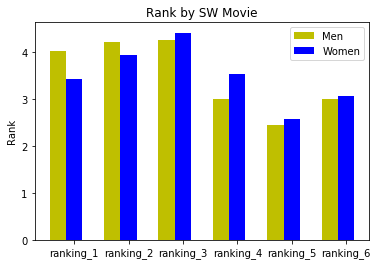

In [221]:
#SW ranking by gender
fig, ax=plt.subplots()
ind=np.arange(6)+.25 #the x locations for seen. .25 spaces off origin.
barwidth=0.3  #the width of bars
ax.bar(ind,male_sw_ranking,barwidth,color='y')  #male bars
ax.bar(ind+barwidth,female_sw_ranking,barwidth,color='b')  #female bars with barwidth offset
ax.set_xticklabels(male_sw_ranking.index) #tick labels
ax.set_xticks(ind+barwidth) #specify xtick locations
ax.set_ylabel("Rank")
ax.set_title("Rank by SW Movie")
ax.legend(['Men','Women'])
plt.show()

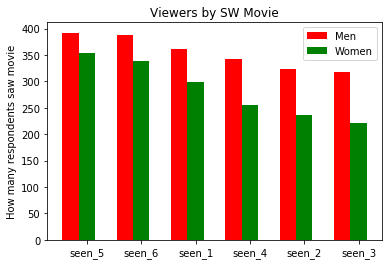

In [222]:
#SW most viewed by gender - seen labels are in same order
fig, ax=plt.subplots()
ind=np.arange(6)+.25 #the x locations for seen. .25 spaces off origin.
barwidth=0.3  #the width of bars
ax.bar(ind,male_sw_seen,barwidth,color='r')  #male bars
ax.bar(ind+barwidth,female_sw_seen,barwidth,color='g') #female bars with barwidth offset
ax.set_xticklabels(male_sw_seen.index) #tick labels
ax.set_xticks(ind+barwidth) #specify xtick locations
ax.set_ylabel("How many respondents saw movie")
ax.set_title("Viewers by SW Movie")
ax.legend(['Men','Women'])
plt.show()

In [223]:
#Gender observations:
# 1) Men saw more of the movies than women
# 2) "New" series rankings were higher, excluding women Ep 1.

In [224]:
star_wars.columns[15:29]

Index(['Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28'],
      dtype='object')

In [225]:
star_wars.rename(columns=
                {
                'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.':'Han',
                'Unnamed: 16':'Luke',
                'Unnamed: 17':'Leia',
                'Unnamed: 18':'Anakin',
                'Unnamed: 19':'Obi Wan',
                'Unnamed: 20':'Palpatine',
                'Unnamed: 21':'Darth Vader',
                'Unnamed: 22':'Lando',
                'Unnamed: 23':'Boba Fett',
                'Unnamed: 24':'C-3PO',
                'Unnamed: 25':'R2-D2',
                'Unnamed: 26':'Jar Jar',
                'Unnamed: 27':'Padme',
                'Unnamed: 28':'Yoda',
                },inplace=True)

In [226]:
star_wars.columns[15:29]

Index(['Han', 'Luke', 'Leia', 'Anakin', 'Obi Wan', 'Palpatine', 'Darth Vader',
       'Lando', 'Boba Fett', 'C-3PO', 'R2-D2', 'Jar Jar', 'Padme', 'Yoda'],
      dtype='object')

In [227]:
#HIGHEST RANKED MOVIES BY EDUCATION
star_wars.iloc[:,[9,10,11,12,13,14,36]].groupby("Education")\
         .agg(np.mean)\
         .sort_values(by="ranking_1")

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
Education,,,,,,
Some college or Associate degree,3.551181,3.885827,4.102362,3.503937,2.783465,3.173228
High school degree,3.802817,3.746479,4.126761,3.211268,2.873239,3.239437
Graduate degree,3.822222,4.225664,4.500000,3.199115,2.323009,2.920354
Bachelor degree,3.828244,4.290076,4.521073,3.114504,2.309160,2.931298
Less than high school degree,5.000000,5.333333,3.666667,2.666667,1.000000,3.333333


In [228]:
#HIGHEST RANKED MOVIES BY EDUCATION
star_wars.iloc[:,[9,10,11,12,13,14,37]].groupby("Location (Census Region)")\
         .agg(np.mean)\
         .sort_values(by="ranking_1")

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
Location (Census Region),,,,,,
West South Central,3.394737,4.118421,4.473684,3.657895,2.421053,2.934211
Pacific,3.582192,3.821918,4.171233,3.219178,2.739726,3.465753
West North Central,3.671053,4.105263,4.355263,3.368421,2.552632,2.947368
South Atlantic,3.684211,4.180451,4.443609,3.406015,2.398496,2.887218
East North Central,3.723881,4.074627,4.410448,3.358209,2.373134,3.059701
East South Central,3.875000,4.593750,4.375000,2.875000,2.250000,3.031250
Middle Atlantic,3.924731,4.215054,4.413043,3.064516,2.440860,2.924731
Mountain,4.000000,4.000000,4.279412,2.970588,2.794118,2.955882
New England,4.203390,4.166667,4.133333,3.083333,2.516667,2.866667


In [229]:
favor_dict={
            'Very favorably': 'Favor',
            'Somewhat favorably':'Favor',
            'Neither favorably nor unfavorably (neutral)':'Neutral',
            'Somewhat unfavorably':'Unfavor',
            'Very unfavorably':'Unfavor',                
            'Unfamiliar (N/A)':'Neutral',
            'Neutral':'Neutral'
            }

In [230]:
cols=np.arange(15,30)

for col in cols:
    star_wars.iloc[:,col]=star_wars.iloc[:,col].replace(np.nan,'Neutral')
    star_wars.iloc[:,col]=star_wars.iloc[:,col].map(favor_dict)
    
star_wars.iloc[0:10,14:29]

,ranking_6,Han,Luke,Leia,Anakin,Obi Wan,Palpatine,Darth Vader,Lando,Boba Fett,C-3PO,R2-D2,Jar Jar,Padme,Yoda
1,6.0,Favor,Favor,Favor,Favor,Favor,Favor,Favor,Neutral,Neutral,Favor,Favor,Favor,Favor,Favor
2,NaN,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral
3,6.0,Favor,Favor,Favor,Favor,Favor,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral
4,3.0,Favor,Favor,Favor,Favor,Favor,Favor,Favor,Favor,Unfavor,Favor,Favor,Favor,Favor,Favor
5,3.0,Favor,Favor,Favor,Unfavor,Favor,Unfavor,Favor,Neutral,Favor,Favor,Favor,Unfavor,Favor,Favor
6,2.0,Favor,Favor,Favor,Favor,Favor,Neutral,Favor,Neutral,Favor,Favor,Favor,Favor,Neutral,Favor
7,2.0,Favor,Favor,Favor,Favor,Favor,Favor,Favor,Favor,Favor,Favor,Favor,Unfavor,Favor,Favor
8,1.0,Favor,Favor,Favor,Neutral,Favor,Unfavor,Unfavor,Neutral,Favor,Favor,Favor,Unfavor,Unfavor,Favor
9,3.0,Favor,Unfavor,Favor,Favor,Favor,Favor,Favor,Favor,Favor,Neutral,Favor,Unfavor,Unfavor,Favor
10,6.0,Neutral,Favor,Favor,Favor,Favor,Unfavor,Favor,Unfavor,Unfavor,Favor,Favor,Favor,Unfavor,Favor


In [233]:
people=['Han','Luke', 'Leia', 'Anakin', 'Obi Wan', 'Palpatine','Darth Vader', 'Lando', 'Boba Fett',\
        'C-3PO', 'R2-D2', 'Jar Jar','Padme', 'Yoda']
#print(star_wars.groupby('Han').size())

char_favor=pd.DataFrame()

for person in people:
    char_favor[person]=star_wars.groupby(person).size()

char_favor.index.name="Likeability"
#char_favor.reset_index(inplace=True)
char_favor=char_favor.transpose()
char_favor=char_favor.sort_values(by="Favor",ascending=False)
char_favor

Likeability,Favor,Neutral,Unfavor
Luke,771,399,16
Han,761,416,9
Leia,757,411,18
Obi Wan,750,421,15
Yoda,749,421,16
R2-D2,747,423,16
C-3PO,703,453,30
Anakin,514,550,122
Darth Vader,481,454,251
Lando,365,750,71


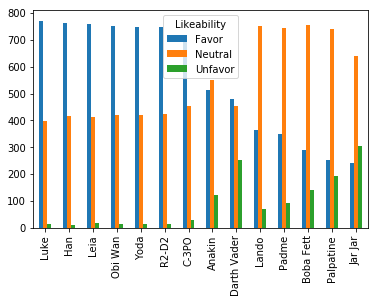

In [235]:
char_favor.plot.bar()
plt.show()